In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

c:\Users\Administratior\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'KFS_Processed.csv'
data = pd.read_csv(file_path)

filtered_data = data[(data['PBLH_1_1_1'] >= 0) & (data['PBLH_1_1_1'] <= 2500)]

In [10]:
columns = ['PBLH_1_1_1', 'USTAR_1_1_1', 'H_1_1_1', 'TA_1_1_1', 'PA_1_1_1']
data_selected = filtered_data[columns].dropna()
data_selected

,PBLH_1_1_1,USTAR_1_1_1,H_1_1_1,TA_1_1_1,PA_1_1_1
115,636.69,0.54125,30.9740,-4.38741,97.270728
116,705.85,0.50486,29.2180,-4.63626,97.216602
117,774.78,0.58121,35.9760,-4.83508,97.193606
118,800.35,0.51958,41.3730,-5.05597,97.157045
119,774.79,0.55559,47.0620,-5.35906,97.114135
...,...,...,...,...,...
34986,326.18,0.40736,-2.5022,5.18460,96.849000
34987,332.81,0.35826,-1.7611,5.18540,96.826000
34988,336.24,0.36557,-2.1398,5.14860,96.799000
34989,338.62,0.30440,-3.7005,5.23400,96.762000


In [14]:
columns = ['ZL_1_1_1', 'USTAR_1_1_1','H_1_1_1', 'TA_1_1_1', 'PA_1_1_1', 'RH_1_1_1']
data_selected = filtered_data[columns].dropna()
data_selected

,ZL_1_1_1,USTAR_1_1_1,H_1_1_1,TA_1_1_1,PA_1_1_1,RH_1_1_1
115,-1.820741,0.54125,30.9740,-4.38741,97.270728,56.2915
116,-1.215226,0.50486,29.2180,-4.63626,97.216602,57.7003
117,-1.576864,0.58121,35.9760,-4.83508,97.193606,58.9988
119,-2.055472,0.55559,47.0620,-5.35906,97.114135,62.1518
120,-0.352468,0.60024,78.2900,-5.29962,97.011533,62.2144
...,...,...,...,...,...,...
34544,-0.149887,0.20611,39.3800,10.91400,96.809000,96.8260
34545,0.068300,0.11597,-3.1971,10.70700,96.843000,95.3548
34643,0.456634,0.12206,-25.1660,9.22170,98.209000,82.0684
34688,0.007770,0.29998,-6.3300,11.52600,97.614000,91.2229


In [15]:
print(max(data_selected['ZL_1_1_1']), min(data_selected['ZL_1_1_1']))

53.22111568 -18.11804221


[270.89737298 270.68961941 270.50748402 ... 280.89928238 281.01619507
 281.34755463]
[ 174.57057582  150.07343477  185.83840149 ... -807.3445346  -269.63402938
 -324.88829888]
Mean Squared Error: 885244.1248189097
R-squared: -2.425990801380181
Coefficient of the best fit line: 0.017113352512680983


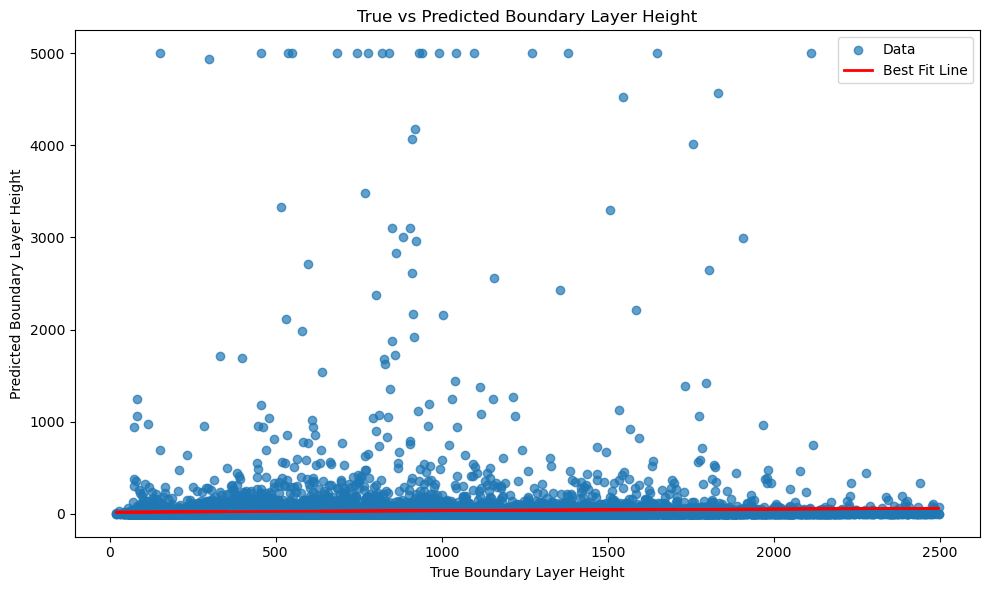

In [12]:
## Formula used: boundary layer height

# Constants
g = 9.81  # gravitational acceleration in m/s^2
R = 287.05  # specific gas constant for dry air in J/(kg·K)
cp = 1004.0  # specific heat capacity at constant pressure in J/(kg·K)
reference_pressure = 1000.0  # reference pressure in hPa
rho = 1.23  # in kg/m^3 (typical sea-level value)

# Function to calculate potential temperature
def calculate_potential_temperature(temperature, pressure, reference_pressure):
    return (temperature) * (reference_pressure / pressure) ** (R / cp)


USTAR = data_selected['USTAR_1_1_1'].values  # friction velocity in m/s
H = data_selected['H_1_1_1'].values  # sensible heat flux in W/m^2
TA = data_selected['TA_1_1_1'].values + 273.15  # surface air temperature in Kelvin
PA = data_selected['PA_1_1_1'].values*10  # surface pressure in hPa
PBLH_true = data_selected['PBLH_1_1_1'].values  # true boundary layer height


theta_s = calculate_potential_temperature(TA, PA, reference_pressure)
print(theta_s)


PBLH_pred = (USTAR ** 3 * theta_s * rho * cp) / (g * H)
print(PBLH_pred)

PBLH_pred = np.clip(PBLH_pred, 0, 5000)

mse = mean_squared_error(PBLH_true, PBLH_pred)
r2 = r2_score(PBLH_true, PBLH_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(PBLH_true, PBLH_pred, alpha=0.7, label='Data')
plt.xlabel('True Boundary Layer Height')
plt.ylabel('Predicted Boundary Layer Height')
plt.title('True vs Predicted Boundary Layer Height')


reg = LinearRegression().fit(PBLH_true.reshape(-1, 1), PBLH_pred)
line_fit = reg.predict(PBLH_true.reshape(-1, 1))


plt.plot(PBLH_true, line_fit, color='red', linewidth=2, label='Best Fit Line')
plt.legend()


print(f"Coefficient of the best fit line: {reg.coef_[0]}")

plt.tight_layout()
plt.show()

[270.89737298 270.68961941 270.50748402 ... 283.83448844 286.64832584
 286.23649668]
[-436.42643954 -375.18358692 -464.59600373 ...    6.45477183  384.70907183
   92.49102194]
Mean Squared Error: 1798938407.1868703
R-squared: 0.0067242485698588705
Coefficient of the best fit line: 0.004406841542902684


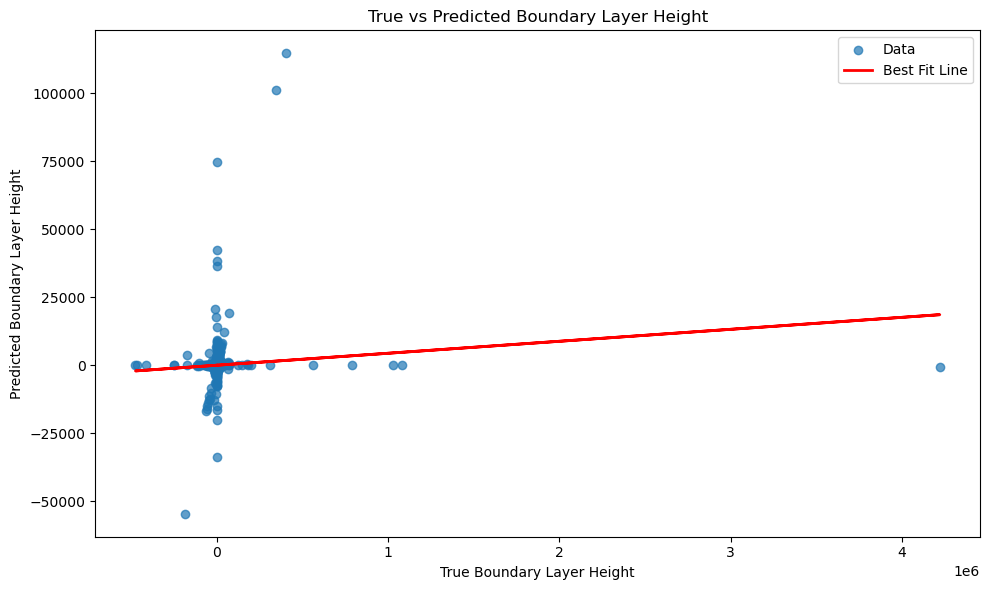

In [16]:
## Formula used: Monin-Obukhov length


g = 9.81  # gravitational acceleration in m/s^2
R = 287.05  # specific gas constant for dry air in J/(kg·K)
cp = 1004.0  # specific heat capacity at constant pressure in J/(kg·K)
reference_pressure = 1000.0  # reference pressure in hPa
rho = 1.23  # in kg/m^3 (typical sea-level value)
k = 0.4


def calculate_potential_temperature(temperature, pressure, reference_pressure):
    return (temperature) * (reference_pressure / pressure) ** (R / cp)


USTAR = data_selected['USTAR_1_1_1'].values  # friction velocity in m/s
H = data_selected['H_1_1_1'].values  # sensible heat flux in W/m^2
TA = data_selected['TA_1_1_1'].values + 273.15  # surface air temperature in Kelvin
PA = data_selected['PA_1_1_1'].values*10  # surface pressure in hPa
L_true = 10 / data_selected['ZL_1_1_1'].values  # true boundary layer height


theta_s = calculate_potential_temperature(TA, PA, reference_pressure)
print(theta_s)


L_pred = (- USTAR ** 3 * theta_s * rho * cp) / (g * H * k)
print(L_pred)



mse = mean_squared_error(L_true, L_pred)
r2 = r2_score(L_true, L_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(L_true, L_pred, alpha=0.7, label='Data')
plt.xlabel('True Boundary Layer Height')
plt.ylabel('Predicted Boundary Layer Height')
plt.title('True vs Predicted Boundary Layer Height')

reg = LinearRegression().fit(L_true.reshape(-1, 1), L_pred)
line_fit = reg.predict(L_true.reshape(-1, 1))

# Plot the line fit
plt.plot(L_true, line_fit, color='red', linewidth=2, label='Best Fit Line')
plt.legend()

# Print the coefficient of the best fit line
print(f"Coefficient of the best fit line: {reg.coef_[0]}")

plt.tight_layout()
plt.show()